In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from rff.layers import GaussianEncoding
from sklearn.model_selection import RandomizedSearchCV

Using Scenario A1, 15s dataset for classifcation on class1 variable

In [2]:
# df = pd.read_csv(r"C:\Users\smbm2\projects\research\csv_datasets\Scenario A1\TimeBasedFeatures-Dataset-15s-VPN.csv") # personal
df = pd.read_csv(r"C:\python\research\csv_datasets\Scenario A1\TimeBasedFeatures-Dataset-15s-VPN.csv") # for IR

df.head()

,Unnamed: 0,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN
1,1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN
2,2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN
3,3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN
4,4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN


In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN


In [4]:
le = LabelEncoder()
df['class1'] = le.fit_transform(df['class1'])
df.head()

,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,0
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,0
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,0
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,0
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,0


In [5]:
df['class1'].value_counts()

1    9793
0    8965
Name: class1, dtype: int64

In [6]:
df.isna().any()

duration              False
total_fiat            False
total_biat            False
min_fiat              False
min_biat              False
max_fiat              False
max_biat              False
mean_fiat             False
mean_biat             False
flowPktsPerSecond     False
flowBytesPerSecond    False
min_flowiat           False
max_flowiat           False
mean_flowiat          False
std_flowiat           False
min_active            False
mean_active           False
max_active            False
std_active            False
min_idle              False
mean_idle             False
max_idle              False
std_idle              False
class1                False
dtype: bool

In [7]:
class vpnDataset(Dataset):
    def __init__(self, df, target = 'class1'):
        self.n = df.shape[0]
        
        self.y = df[target].astype(np.float32).values

        self.x = df.drop(columns=[target]).astype(np.float32).values

    def __len__(self):
        return self.n
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]


In [8]:
vpn_dataset = vpnDataset(df)

In [9]:
len(vpn_dataset)

18758

In [10]:
vpn_dataset[:5]

(array([[9.36871100e+06, 1.60000000e+01, 4.00000000e+00, 1.56481800e+06,
         1.54937300e+06, 1.90205281e+05, 2.03290453e+05, 3.89822406e+05,
         3.70323719e+05, 1.03536119e+01, 4.80268848e+03, 4.00000000e+00,
         1.52308800e+06, 9.75907422e+04, 2.67600188e+05, 1.87148800e+06,
         1.98365638e+06, 2.19508900e+06, 1.83219703e+05, 1.23488300e+06,
         1.42056500e+06, 1.52308800e+06, 1.61096547e+05],
        [7.34023800e+06, 1.80000000e+01, 4.00000000e+00, 1.56755400e+06,
         1.52789300e+06, 1.65686984e+05, 1.86914844e+05, 3.17267562e+05,
         3.04370656e+05, 1.15800056e+01, 4.34018604e+03, 4.00000000e+00,
         1.51777400e+06, 8.73837891e+04, 2.21462859e+05, 1.49162700e+06,
         3.57243300e+06, 5.65323900e+06, 2.94270400e+06, 1.13149800e+06,
         1.32463600e+06, 1.51777400e+06, 2.73138375e+05],
        [4.64422500e+06, 2.90000000e+01, 1.50000000e+01, 1.27054700e+06,
         1.07997400e+06, 1.65865172e+05, 1.95302125e+05, 3.29473125e+05,
        

In [9]:
train_size = int(0.7*len(vpn_dataset))
print(train_size)
test_size = len(vpn_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(vpn_dataset, [train_size, test_size])
print(len(train_dataset), len(test_dataset))

13130
13130 5628


In [10]:
batch_sz = 256
train_dataloader = DataLoader(train_dataset, batch_size=batch_sz, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_sz, shuffle=False)

In [13]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    print("Input sizes:", inputs.size())
    print("Target sizes:", targets.size())

    # You can also print the actual data if you want to see the values
    print("Inputs:")
    print(inputs)
    print("Targets:")
    print(targets)

Batch Index: 0
Input sizes: torch.Size([128, 23])
Target sizes: torch.Size([128])
Inputs:
tensor([[ 5.9843e+05,  2.4000e+01,  3.1000e+01,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4991e+07,  1.1000e+01,  1.4000e+01,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4980e+07,  2.0100e+02,  1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        ...,
        [ 6.8100e+02,  6.8100e+02, -1.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4909e+07,  1.3700e+02,  6.0000e+00,  ...,  0.0000e+00,
         -1.0000e+00,  0.0000e+00],
        [ 1.4976e+07,  2.9000e+01,  9.0000e+00,  ...,  3.3496e+06,
          7.1271e+06,  3.2733e+06]])
Targets:
tensor([1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 1

data is prepared. Now for the model

In [43]:
class vpnClassifier(nn.Module):
    def __init__(self, n_features=23, sigma=4, encoded_size=10, dropout_rate=0.5):
        super().__init__()

        self.embeddings = nn.ModuleList([GaussianEncoding(sigma = sigma, input_size=1, encoded_size=encoded_size) 
                                         for k in range(n_features)])
        
        self.input_size = encoded_size*2*n_features
        
        self.drop = nn.Dropout(p=dropout_rate)
        self.bn1 = nn.BatchNorm1d(self.input_size)
        self.lin1 = nn.Linear(self.input_size, self.input_size//2)
        self.bn2 = nn.BatchNorm1d(self.input_size//2)
        self.lin2 = nn.Linear(self.input_size//2, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.initialize_weights()

    def initialize_weights(self):
        torch.nn.init.kaiming_normal_(self.lin1.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin1.bias)

        torch.nn.init.kaiming_normal_(self.lin2.weight, nonlinearity='relu')
        torch.nn.init.zeros_(self.lin2.bias)
        
    def forward(self, x):
        x = x.unsqueeze(2)
        x_list = []
        for i, e in enumerate(self.embeddings):
            # print(x[:, i,:].shape)
            x_i = e(x[:, i,:])
            # print(x_i.shape)
            x_list.append(x_i)
            
        x = torch.cat(x_list, dim=1)
        # print(x)
        # print(x.shape)
        x = self.drop(x)

        x = self.bn1(x)
        x = self.lin1(x)
        x = self.relu(x)
        x = self.drop(x)
        x = self.bn2(x)
        x = self.lin2(x)
        x = self.sigmoid(x)
        # print(x)
        # print(x.shape)
        # print(x.squeeze())
        # print(x.shape)
        return x.squeeze(1)


In [44]:
model = vpnClassifier(encoded_size=15, dropout_rate=0.8)

In [45]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0

    for batch_idx, (inputs, targets) in enumerate(dataloader):
        # print(batch_idx, inputs, targets)
        pred = model(inputs)
        # print(pred)
        # print(pred.squeeze(0))
        loss = loss_fn(pred, targets)
        total_loss+= loss.item()

        # Calculate accuracy
        predicted_labels = (pred>0.5).float()
        # print(predicted_labels)
        total_correct += (predicted_labels == targets).sum().item()
        # print(total_correct)
        total_samples += targets.size(0)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    avg_loss = total_loss/len(dataloader)
    accuracy = total_correct / total_samples
    return avg_loss, accuracy
    

def test(dataloader, model, loss_fn):
  model.eval()
  tot = 0
  total_correct = 0
  total_samples = 0
  with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(dataloader):
      #compute prediction error
      pred = model(inputs)
      test_loss = loss_fn(pred, targets)
      tot += test_loss

      # Calculate accuracy
      predicted_labels = (pred>0.5).float()
      # print(predicted_labels)
      total_correct += (predicted_labels == targets).sum().item()
      # print(total_correct)
      total_samples += targets.size(0)

  avg = tot/len(dataloader)
  accuracy = total_correct / total_samples

  return avg, accuracy

Epoch 1/50, Train Loss: 0.6983, Test Loss: 0.6204, Train Accuracy: 0.5917, Test Accuracy: 0.6560
Epoch 2/50, Train Loss: 0.6339, Test Loss: 0.6052, Train Accuracy: 0.6312, Test Accuracy: 0.6668
Epoch 3/50, Train Loss: 0.6194, Test Loss: 0.6000, Train Accuracy: 0.6469, Test Accuracy: 0.6610
Epoch 4/50, Train Loss: 0.6073, Test Loss: 0.5900, Train Accuracy: 0.6580, Test Accuracy: 0.6825
Epoch 5/50, Train Loss: 0.5968, Test Loss: 0.5818, Train Accuracy: 0.6615, Test Accuracy: 0.6821
Epoch 6/50, Train Loss: 0.5868, Test Loss: 0.5628, Train Accuracy: 0.6745, Test Accuracy: 0.7036
Epoch 7/50, Train Loss: 0.5804, Test Loss: 0.5563, Train Accuracy: 0.6708, Test Accuracy: 0.6992
Epoch 8/50, Train Loss: 0.5709, Test Loss: 0.5508, Train Accuracy: 0.6858, Test Accuracy: 0.7020
Epoch 9/50, Train Loss: 0.5667, Test Loss: 0.5417, Train Accuracy: 0.6889, Test Accuracy: 0.7079
Epoch 10/50, Train Loss: 0.5600, Test Loss: 0.5539, Train Accuracy: 0.6918, Test Accuracy: 0.7081
Epoch 11/50, Train Loss: 0.55

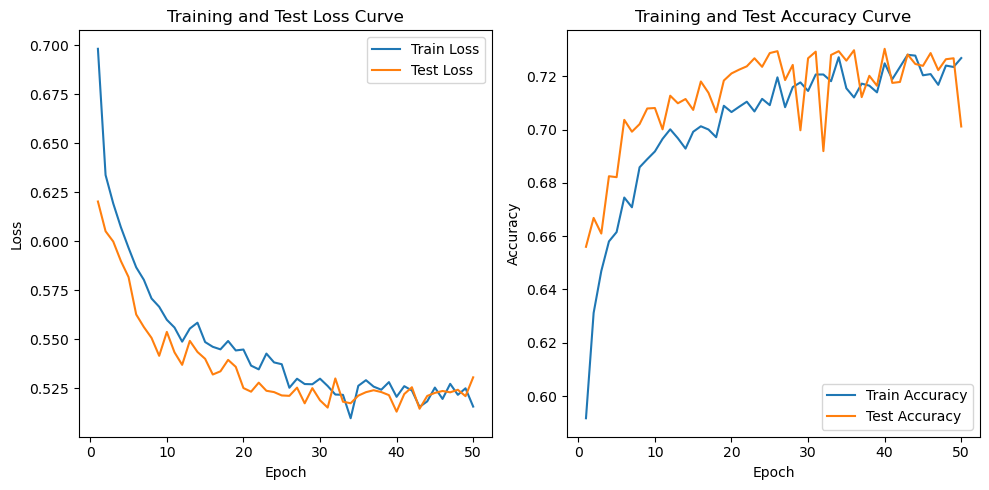

Best accuracy: 0.7302771855010661


In [22]:
#lr = 0.01, sigma = 2, batches = 256, dropout = 0.5, encoding size = 20
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")


Epoch 1/50, Train Loss: 0.6983, Test Loss: 0.6149, Train Accuracy: 0.5902, Test Accuracy: 0.6514
Epoch 2/50, Train Loss: 0.6280, Test Loss: 0.5999, Train Accuracy: 0.6308, Test Accuracy: 0.6684
Epoch 3/50, Train Loss: 0.6136, Test Loss: 0.5850, Train Accuracy: 0.6455, Test Accuracy: 0.6729
Epoch 4/50, Train Loss: 0.6017, Test Loss: 0.5850, Train Accuracy: 0.6538, Test Accuracy: 0.6818
Epoch 5/50, Train Loss: 0.5891, Test Loss: 0.5681, Train Accuracy: 0.6684, Test Accuracy: 0.6946
Epoch 6/50, Train Loss: 0.5815, Test Loss: 0.5635, Train Accuracy: 0.6752, Test Accuracy: 0.7043
Epoch 7/50, Train Loss: 0.5737, Test Loss: 0.5510, Train Accuracy: 0.6784, Test Accuracy: 0.7095
Epoch 8/50, Train Loss: 0.5702, Test Loss: 0.5501, Train Accuracy: 0.6786, Test Accuracy: 0.7047
Epoch 9/50, Train Loss: 0.5638, Test Loss: 0.5474, Train Accuracy: 0.6922, Test Accuracy: 0.7097
Epoch 10/50, Train Loss: 0.5637, Test Loss: 0.5510, Train Accuracy: 0.6896, Test Accuracy: 0.7145
Epoch 11/50, Train Loss: 0.55

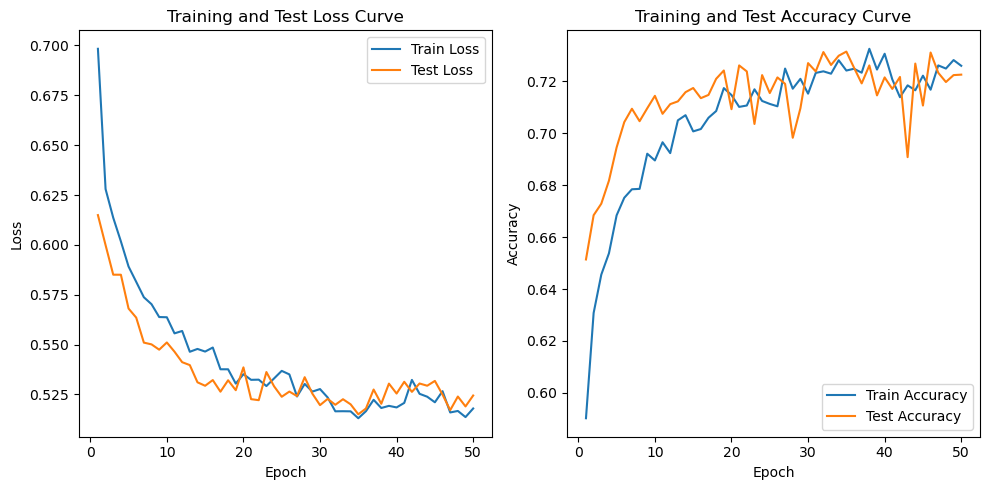

Best accuracy: 0.7315209665955935


In [26]:
#lr = 0.01, sigma = 4, batches = 256, dropout = 0.5, encoding size = 20
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")


Epoch 1/50, Train Loss: 0.6919, Test Loss: 0.6329, Train Accuracy: 0.5851, Test Accuracy: 0.6226
Epoch 2/50, Train Loss: 0.6367, Test Loss: 0.6236, Train Accuracy: 0.6214, Test Accuracy: 0.6366
Epoch 3/50, Train Loss: 0.6167, Test Loss: 0.6070, Train Accuracy: 0.6392, Test Accuracy: 0.6526
Epoch 4/50, Train Loss: 0.6107, Test Loss: 0.5951, Train Accuracy: 0.6458, Test Accuracy: 0.6590
Epoch 5/50, Train Loss: 0.5985, Test Loss: 0.5995, Train Accuracy: 0.6547, Test Accuracy: 0.6624
Epoch 6/50, Train Loss: 0.5880, Test Loss: 0.5842, Train Accuracy: 0.6672, Test Accuracy: 0.6761
Epoch 7/50, Train Loss: 0.5885, Test Loss: 0.5832, Train Accuracy: 0.6618, Test Accuracy: 0.6676
Epoch 8/50, Train Loss: 0.5856, Test Loss: 0.5809, Train Accuracy: 0.6686, Test Accuracy: 0.6780
Epoch 9/50, Train Loss: 0.5812, Test Loss: 0.5773, Train Accuracy: 0.6721, Test Accuracy: 0.6759
Epoch 10/50, Train Loss: 0.5773, Test Loss: 0.5814, Train Accuracy: 0.6757, Test Accuracy: 0.6843
Epoch 11/50, Train Loss: 0.56

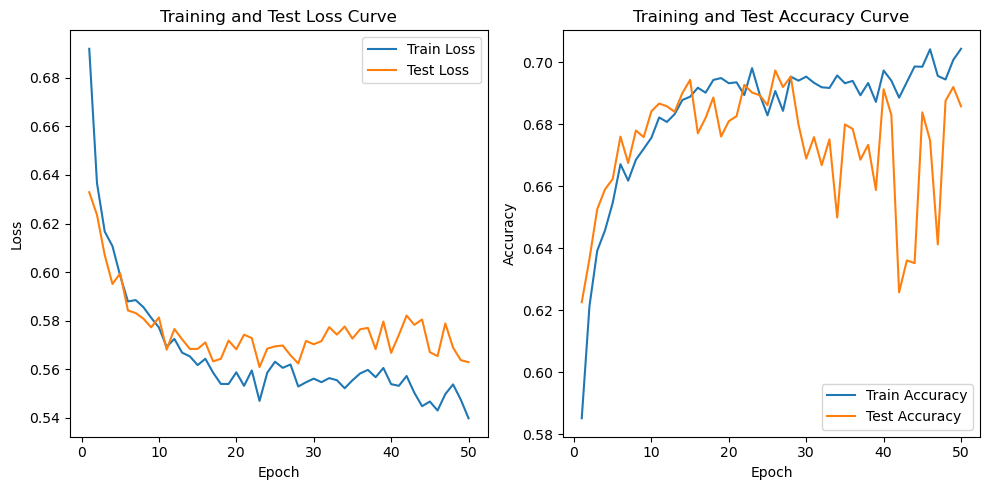

Best accuracy: 0.6974058280028429


In [30]:
#lr = 0.01, sigma = 10, batches = 256, dropout = 0.5, encoding size = 20
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")


Model suffers from too big of a sigma

Epoch 1/50, Train Loss: 0.7192, Test Loss: 0.6007, Train Accuracy: 0.5901, Test Accuracy: 0.6585
Epoch 2/50, Train Loss: 0.6138, Test Loss: 0.5816, Train Accuracy: 0.6478, Test Accuracy: 0.6770
Epoch 3/50, Train Loss: 0.5906, Test Loss: 0.5612, Train Accuracy: 0.6736, Test Accuracy: 0.6921
Epoch 4/50, Train Loss: 0.5707, Test Loss: 0.5469, Train Accuracy: 0.6854, Test Accuracy: 0.7104
Epoch 5/50, Train Loss: 0.5531, Test Loss: 0.5359, Train Accuracy: 0.6956, Test Accuracy: 0.7102
Epoch 6/50, Train Loss: 0.5350, Test Loss: 0.5250, Train Accuracy: 0.7086, Test Accuracy: 0.7114
Epoch 7/50, Train Loss: 0.5205, Test Loss: 0.5189, Train Accuracy: 0.7215, Test Accuracy: 0.7214
Epoch 8/50, Train Loss: 0.5161, Test Loss: 0.5256, Train Accuracy: 0.7287, Test Accuracy: 0.7114
Epoch 9/50, Train Loss: 0.4949, Test Loss: 0.5085, Train Accuracy: 0.7416, Test Accuracy: 0.7281
Epoch 10/50, Train Loss: 0.4966, Test Loss: 0.5036, Train Accuracy: 0.7347, Test Accuracy: 0.7301
Epoch 11/50, Train Loss: 0.48

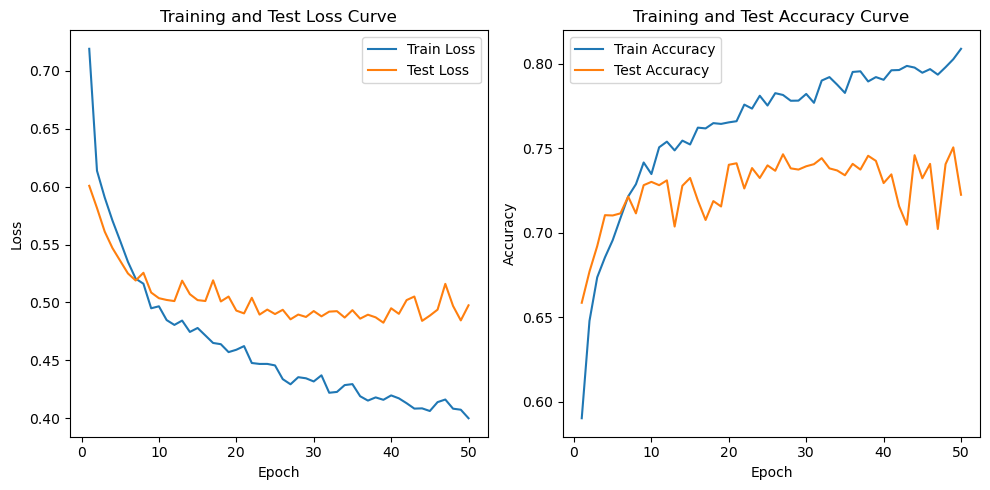

Best accuracy: 0.7505330490405118


In [39]:
#lr = 0.01, sigma = 4, batches = 256, dropout = 0.5, encoding size = 40
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")


Epoch 1/50, Train Loss: 0.7357, Test Loss: 0.6713, Train Accuracy: 0.5268, Test Accuracy: 0.5821
Epoch 2/50, Train Loss: 0.6794, Test Loss: 0.6677, Train Accuracy: 0.5581, Test Accuracy: 0.5897
Epoch 3/50, Train Loss: 0.6750, Test Loss: 0.6638, Train Accuracy: 0.5574, Test Accuracy: 0.6015
Epoch 4/50, Train Loss: 0.6702, Test Loss: 0.6626, Train Accuracy: 0.5606, Test Accuracy: 0.5945
Epoch 5/50, Train Loss: 0.6696, Test Loss: 0.6581, Train Accuracy: 0.5676, Test Accuracy: 0.5991
Epoch 6/50, Train Loss: 0.6666, Test Loss: 0.6555, Train Accuracy: 0.5711, Test Accuracy: 0.5862
Epoch 7/50, Train Loss: 0.6642, Test Loss: 0.6538, Train Accuracy: 0.5741, Test Accuracy: 0.6061
Epoch 8/50, Train Loss: 0.6628, Test Loss: 0.6543, Train Accuracy: 0.5783, Test Accuracy: 0.5940
Epoch 9/50, Train Loss: 0.6613, Test Loss: 0.6524, Train Accuracy: 0.5812, Test Accuracy: 0.6143
Epoch 10/50, Train Loss: 0.6623, Test Loss: 0.6484, Train Accuracy: 0.5814, Test Accuracy: 0.6132
Epoch 11/50, Train Loss: 0.65

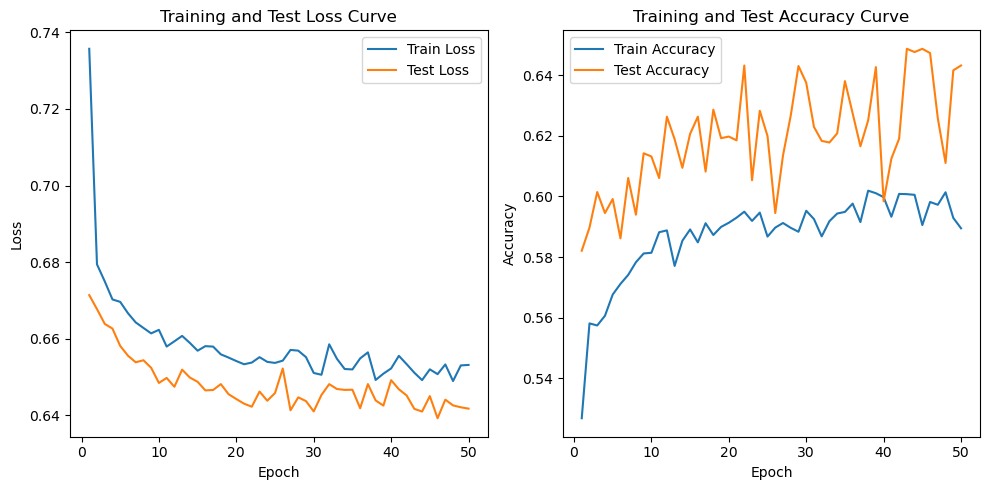

Best accuracy: 0.6487206823027718


In [42]:
#lr = 0.01, sigma = 4, batches = 256, dropout = 0.5, encoding size = 4
epochs = 50
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

suffers from too small of an embedding size

Epoch 1/100, Train Loss: 0.8206, Test Loss: 0.6562, Train Accuracy: 0.5261, Test Accuracy: 0.5997
Epoch 2/100, Train Loss: 0.7503, Test Loss: 0.6480, Train Accuracy: 0.5489, Test Accuracy: 0.6169
Epoch 3/100, Train Loss: 0.7121, Test Loss: 0.6466, Train Accuracy: 0.5567, Test Accuracy: 0.6238
Epoch 4/100, Train Loss: 0.6890, Test Loss: 0.6470, Train Accuracy: 0.5625, Test Accuracy: 0.6205
Epoch 5/100, Train Loss: 0.6733, Test Loss: 0.6468, Train Accuracy: 0.5827, Test Accuracy: 0.6167
Epoch 6/100, Train Loss: 0.6679, Test Loss: 0.6444, Train Accuracy: 0.5826, Test Accuracy: 0.6290
Epoch 7/100, Train Loss: 0.6650, Test Loss: 0.6442, Train Accuracy: 0.5855, Test Accuracy: 0.6311
Epoch 8/100, Train Loss: 0.6620, Test Loss: 0.6429, Train Accuracy: 0.5882, Test Accuracy: 0.6345
Epoch 9/100, Train Loss: 0.6591, Test Loss: 0.6414, Train Accuracy: 0.5982, Test Accuracy: 0.6313
Epoch 10/100, Train Loss: 0.6559, Test Loss: 0.6388, Train Accuracy: 0.5986, Test Accuracy: 0.6334
Epoch 11/100, Train

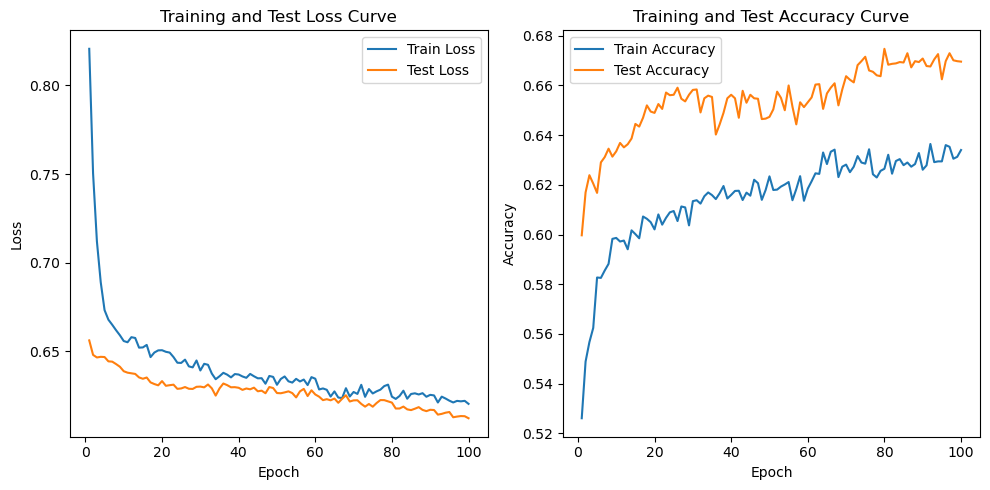

Best accuracy: 0.6746624022743426


In [46]:
#lr = 0.001, sigma = 4, batches = 256, dropout = 0.8, encoding size = 30
epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/75, Train Loss: 0.7515, Test Loss: 0.6844, Train Accuracy: 0.5086, Test Accuracy: 0.5378
Epoch 2/75, Train Loss: 0.7012, Test Loss: 0.6812, Train Accuracy: 0.5254, Test Accuracy: 0.5570
Epoch 3/75, Train Loss: 0.6990, Test Loss: 0.6792, Train Accuracy: 0.5200, Test Accuracy: 0.5629
Epoch 4/75, Train Loss: 0.6958, Test Loss: 0.6772, Train Accuracy: 0.5296, Test Accuracy: 0.5760
Epoch 5/75, Train Loss: 0.6935, Test Loss: 0.6779, Train Accuracy: 0.5293, Test Accuracy: 0.5581
Epoch 6/75, Train Loss: 0.6921, Test Loss: 0.6774, Train Accuracy: 0.5378, Test Accuracy: 0.5624
Epoch 7/75, Train Loss: 0.6894, Test Loss: 0.6803, Train Accuracy: 0.5402, Test Accuracy: 0.5259
Epoch 8/75, Train Loss: 0.6861, Test Loss: 0.6792, Train Accuracy: 0.5433, Test Accuracy: 0.5482
Epoch 9/75, Train Loss: 0.6866, Test Loss: 0.6767, Train Accuracy: 0.5471, Test Accuracy: 0.6111
Epoch 10/75, Train Loss: 0.6852, Test Loss: 0.6742, Train Accuracy: 0.5422, Test Accuracy: 0.5597
Epoch 11/75, Train Loss: 0.68

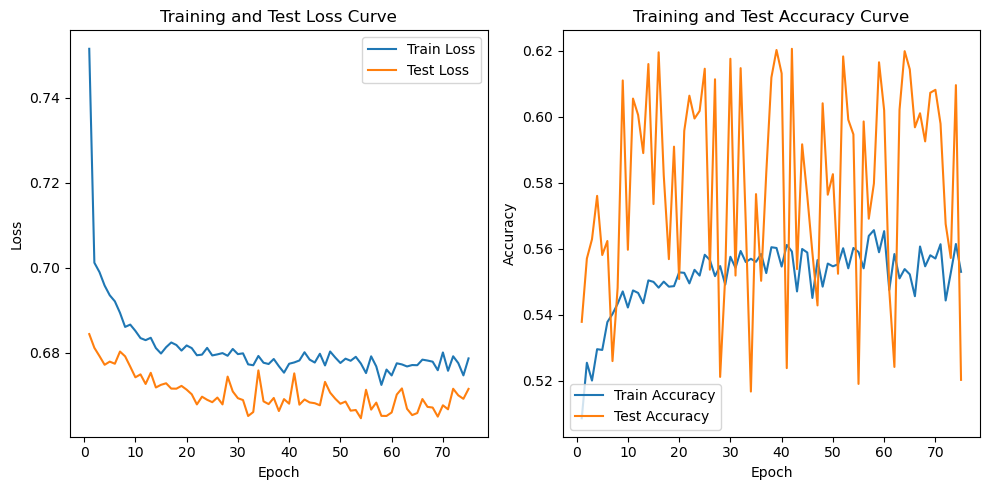

Best accuracy: 0.6206467661691543


In [47]:
#lr = 0.01, sigma = 4, batches = 256, dropout = 0.9, encoding size = 20
model = vpnClassifier(encoded_size=10, dropout_rate=0.9)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 75
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/75, Train Loss: 0.6947, Test Loss: 0.6099, Train Accuracy: 0.5982, Test Accuracy: 0.6564
Epoch 2/75, Train Loss: 0.5990, Test Loss: 0.5819, Train Accuracy: 0.6635, Test Accuracy: 0.6752
Epoch 3/75, Train Loss: 0.5679, Test Loss: 0.5631, Train Accuracy: 0.6877, Test Accuracy: 0.6908
Epoch 4/75, Train Loss: 0.5376, Test Loss: 0.5498, Train Accuracy: 0.7134, Test Accuracy: 0.6972
Epoch 5/75, Train Loss: 0.5145, Test Loss: 0.5402, Train Accuracy: 0.7276, Test Accuracy: 0.7122
Epoch 6/75, Train Loss: 0.5007, Test Loss: 0.5371, Train Accuracy: 0.7427, Test Accuracy: 0.7118
Epoch 7/75, Train Loss: 0.4933, Test Loss: 0.5283, Train Accuracy: 0.7430, Test Accuracy: 0.7125
Epoch 8/75, Train Loss: 0.4626, Test Loss: 0.5326, Train Accuracy: 0.7712, Test Accuracy: 0.7070
Epoch 9/75, Train Loss: 0.4593, Test Loss: 0.5294, Train Accuracy: 0.7732, Test Accuracy: 0.7082
Epoch 10/75, Train Loss: 0.4397, Test Loss: 0.5330, Train Accuracy: 0.7781, Test Accuracy: 0.7072
Epoch 11/75, Train Loss: 0.43

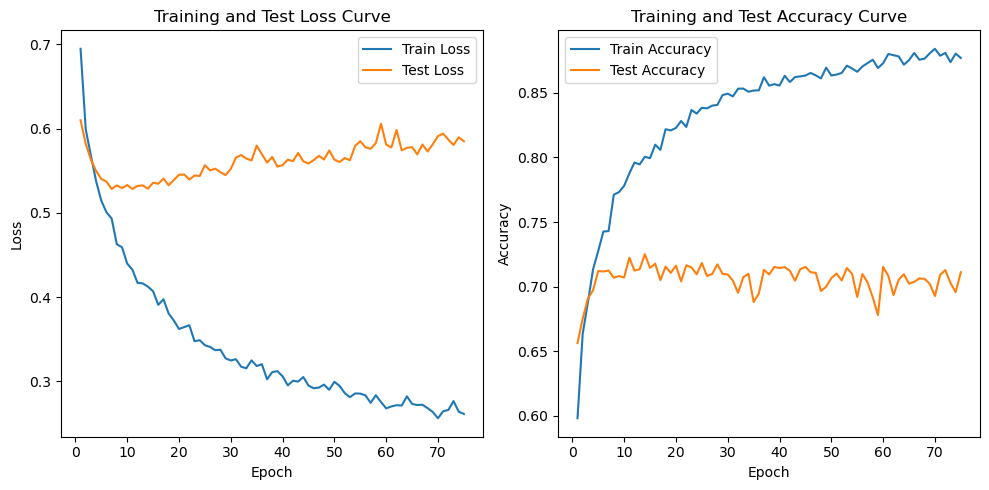

Best accuracy: 0.7251243781094527


In [48]:
#lr = 0.01, sigma = 4, batches = 256, dropout = 0.3, encoding size = 20
model = vpnClassifier(encoded_size=10, dropout_rate=0.3)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 75
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/100, Train Loss: 0.7191, Test Loss: 0.6180, Train Accuracy: 0.5883, Test Accuracy: 0.6366
Epoch 2/100, Train Loss: 0.6365, Test Loss: 0.5961, Train Accuracy: 0.6262, Test Accuracy: 0.6846
Epoch 3/100, Train Loss: 0.6174, Test Loss: 0.5859, Train Accuracy: 0.6446, Test Accuracy: 0.6926
Epoch 4/100, Train Loss: 0.6082, Test Loss: 0.5773, Train Accuracy: 0.6595, Test Accuracy: 0.6885
Epoch 5/100, Train Loss: 0.5986, Test Loss: 0.5667, Train Accuracy: 0.6663, Test Accuracy: 0.6974
Epoch 6/100, Train Loss: 0.5995, Test Loss: 0.5717, Train Accuracy: 0.6628, Test Accuracy: 0.6946
Epoch 7/100, Train Loss: 0.5887, Test Loss: 0.5690, Train Accuracy: 0.6719, Test Accuracy: 0.7042
Epoch 8/100, Train Loss: 0.5797, Test Loss: 0.5553, Train Accuracy: 0.6810, Test Accuracy: 0.7113
Epoch 9/100, Train Loss: 0.5805, Test Loss: 0.5561, Train Accuracy: 0.6807, Test Accuracy: 0.7102
Epoch 10/100, Train Loss: 0.5723, Test Loss: 0.5568, Train Accuracy: 0.6841, Test Accuracy: 0.7070
Epoch 11/100, Train

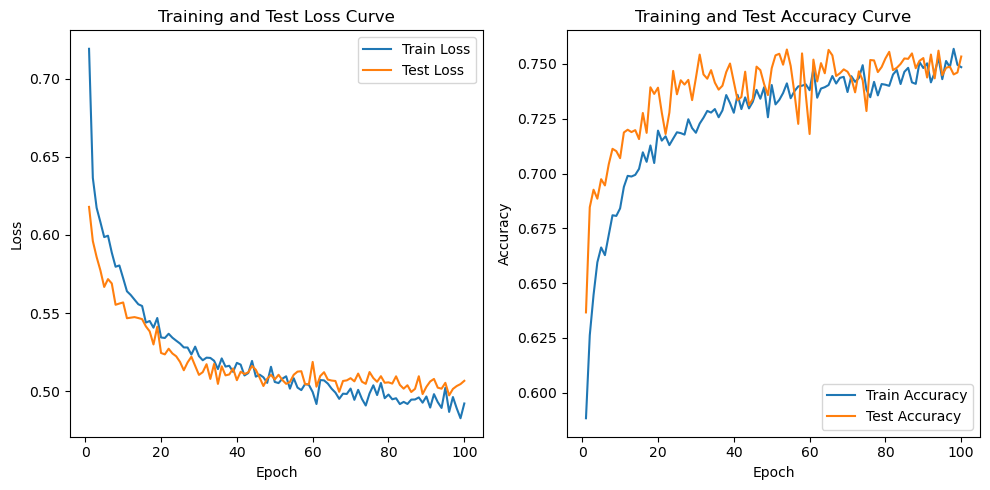

Best accuracy: 0.7565742714996446


In [49]:
#lr = 0.005, sigma = 4, batches = 256, dropout = 0.6, encoding size = 30
model = vpnClassifier(encoded_size=15, dropout_rate=0.6)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/100, Train Loss: 0.7370, Test Loss: 0.6293, Train Accuracy: 0.5650, Test Accuracy: 0.6405
Epoch 2/100, Train Loss: 0.6519, Test Loss: 0.6108, Train Accuracy: 0.6059, Test Accuracy: 0.6699
Epoch 3/100, Train Loss: 0.6373, Test Loss: 0.6002, Train Accuracy: 0.6260, Test Accuracy: 0.6684
Epoch 4/100, Train Loss: 0.6373, Test Loss: 0.5983, Train Accuracy: 0.6179, Test Accuracy: 0.6756
Epoch 5/100, Train Loss: 0.6264, Test Loss: 0.6029, Train Accuracy: 0.6325, Test Accuracy: 0.6608
Epoch 6/100, Train Loss: 0.6221, Test Loss: 0.5986, Train Accuracy: 0.6315, Test Accuracy: 0.6807
Epoch 7/100, Train Loss: 0.6253, Test Loss: 0.5954, Train Accuracy: 0.6322, Test Accuracy: 0.6796
Epoch 8/100, Train Loss: 0.6156, Test Loss: 0.5926, Train Accuracy: 0.6438, Test Accuracy: 0.6827
Epoch 9/100, Train Loss: 0.6174, Test Loss: 0.5960, Train Accuracy: 0.6442, Test Accuracy: 0.6867
Epoch 10/100, Train Loss: 0.6167, Test Loss: 0.5922, Train Accuracy: 0.6405, Test Accuracy: 0.6782
Epoch 11/100, Train

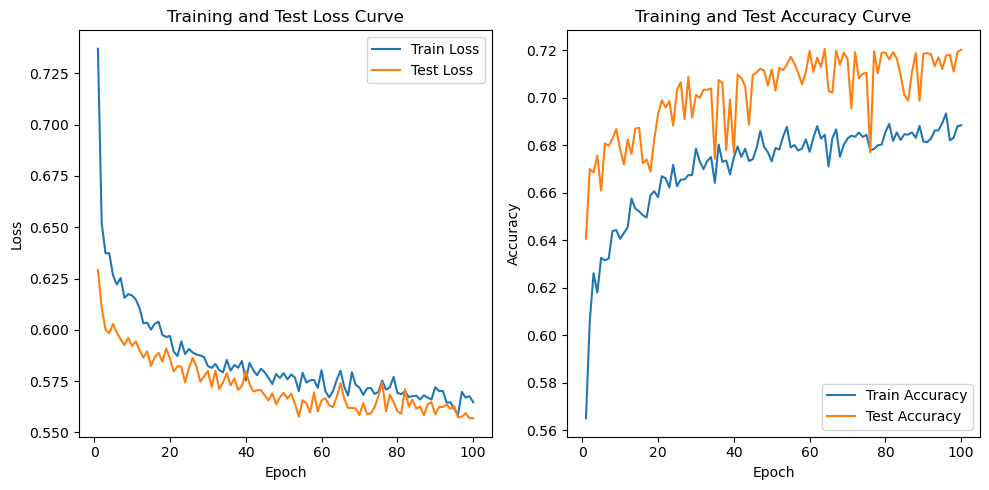

Best accuracy: 0.7205046197583511


In [50]:
#lr = 0.005, sigma = 4, batches = 256, dropout = 0.7, encoding size = 30
model = vpnClassifier(encoded_size=15, dropout_rate=0.7)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/100, Train Loss: 0.7128, Test Loss: 0.6138, Train Accuracy: 0.5928, Test Accuracy: 0.6553
Epoch 2/100, Train Loss: 0.6212, Test Loss: 0.5917, Train Accuracy: 0.6370, Test Accuracy: 0.6796
Epoch 3/100, Train Loss: 0.6080, Test Loss: 0.5854, Train Accuracy: 0.6539, Test Accuracy: 0.6894
Epoch 4/100, Train Loss: 0.5926, Test Loss: 0.5785, Train Accuracy: 0.6698, Test Accuracy: 0.6894
Epoch 5/100, Train Loss: 0.5796, Test Loss: 0.5740, Train Accuracy: 0.6832, Test Accuracy: 0.6969
Epoch 6/100, Train Loss: 0.5687, Test Loss: 0.5636, Train Accuracy: 0.6891, Test Accuracy: 0.6963
Epoch 7/100, Train Loss: 0.5547, Test Loss: 0.5524, Train Accuracy: 0.7003, Test Accuracy: 0.7040
Epoch 8/100, Train Loss: 0.5436, Test Loss: 0.5440, Train Accuracy: 0.7119, Test Accuracy: 0.7052
Epoch 9/100, Train Loss: 0.5285, Test Loss: 0.5411, Train Accuracy: 0.7235, Test Accuracy: 0.7102
Epoch 10/100, Train Loss: 0.5246, Test Loss: 0.5397, Train Accuracy: 0.7226, Test Accuracy: 0.7084
Epoch 11/100, Train

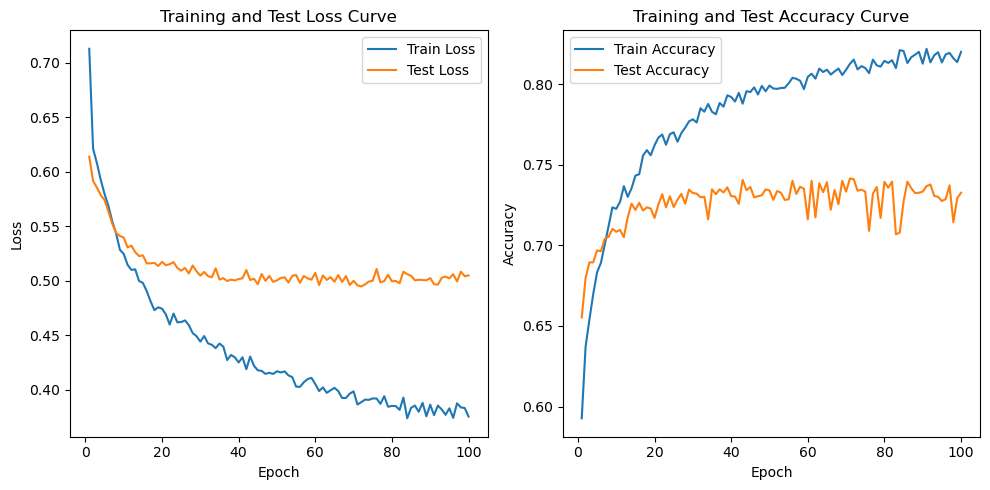

Best accuracy: 0.7414712153518124


In [51]:
#lr = 0.005, sigma = 4, batches = 256, dropout = 0.5, encoding size = 30
model = vpnClassifier(encoded_size=15, dropout_rate=0.5)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 100
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

Epoch 1/125, Train Loss: 0.7147, Test Loss: 0.6160, Train Accuracy: 0.5830, Test Accuracy: 0.6709
Epoch 2/125, Train Loss: 0.6290, Test Loss: 0.5987, Train Accuracy: 0.6312, Test Accuracy: 0.6821
Epoch 3/125, Train Loss: 0.6220, Test Loss: 0.5920, Train Accuracy: 0.6425, Test Accuracy: 0.6873
Epoch 4/125, Train Loss: 0.6142, Test Loss: 0.5868, Train Accuracy: 0.6469, Test Accuracy: 0.6926
Epoch 5/125, Train Loss: 0.5984, Test Loss: 0.5796, Train Accuracy: 0.6660, Test Accuracy: 0.7042
Epoch 6/125, Train Loss: 0.5939, Test Loss: 0.5688, Train Accuracy: 0.6700, Test Accuracy: 0.7079
Epoch 7/125, Train Loss: 0.5894, Test Loss: 0.5733, Train Accuracy: 0.6673, Test Accuracy: 0.7050
Epoch 8/125, Train Loss: 0.5822, Test Loss: 0.5719, Train Accuracy: 0.6759, Test Accuracy: 0.6962
Epoch 9/125, Train Loss: 0.5775, Test Loss: 0.5616, Train Accuracy: 0.6858, Test Accuracy: 0.7040
Epoch 10/125, Train Loss: 0.5699, Test Loss: 0.5547, Train Accuracy: 0.6880, Test Accuracy: 0.7162
Epoch 11/125, Train

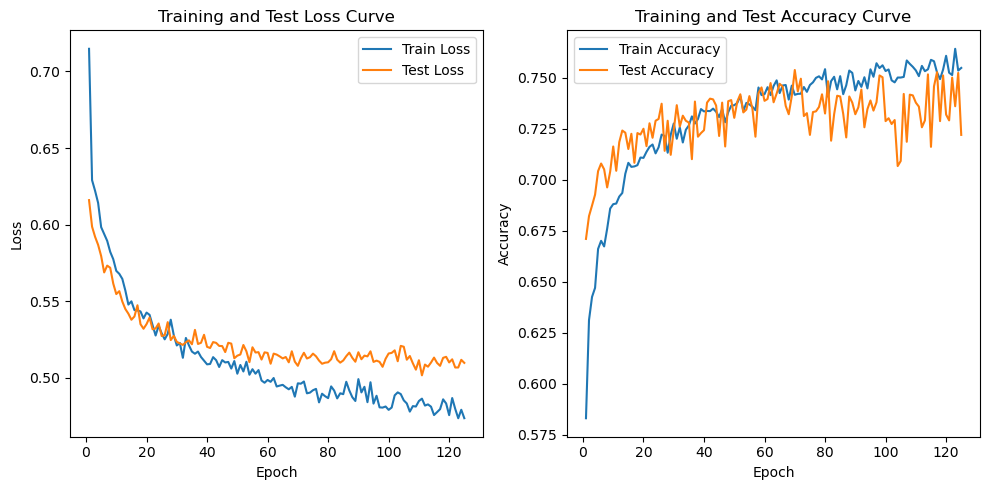

Best accuracy: 0.753731343283582


In [52]:
#lr = 0.005, sigma = 4, batches = 256, dropout = 0.6, encoding size = 30
model = vpnClassifier(encoded_size=15, dropout_rate=0.6)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
epochs = 125
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
for t in range(epochs):
  train_loss, train_accuracy = train(train_dataloader, model, loss_fn, optimizer)
  test_loss, test_accuracy = test(test_dataloader, model, loss_fn)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)
  test_losses.append(test_loss)
  test_accuracies.append(test_accuracy)
  print(f"Epoch {t+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()

# Plotting the accuracy curves
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Best accuracy: {max(test_accuracies)}")

In [53]:
from livelossplot import PlotLosses

In [63]:
dataloaders = {
    "train": train_dataloader,
    "test": test_dataloader
}
def train_model(model, loss_fn, optimizer, num_epochs):
    liveloss = PlotLosses()
    for t in range(num_epochs):
        logs = {}
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                outputs = model(inputs)
                loss = loss_fn(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()


                # Calculate accuracy
                predicted_labels = (outputs>0.5).float()
                # print(predicted_labels)
                running_corrects += (predicted_labels == labels).sum().item()
                
                running_loss += loss.item()

            epoch_loss = running_loss/len(dataloaders[phase].dataset)
            epoch_acc = running_corrects/len(dataloaders[phase].dataset)

            prefix = ''
            if phase == 'test':
                prefix = 'test_'

            logs[prefix + 'log loss'] = epoch_loss
            logs[prefix + 'accuracy'] = epoch_acc
        
        liveloss.update(logs)
        liveloss.send()

In [64]:
model = vpnClassifier(dropout_rate=0.6)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

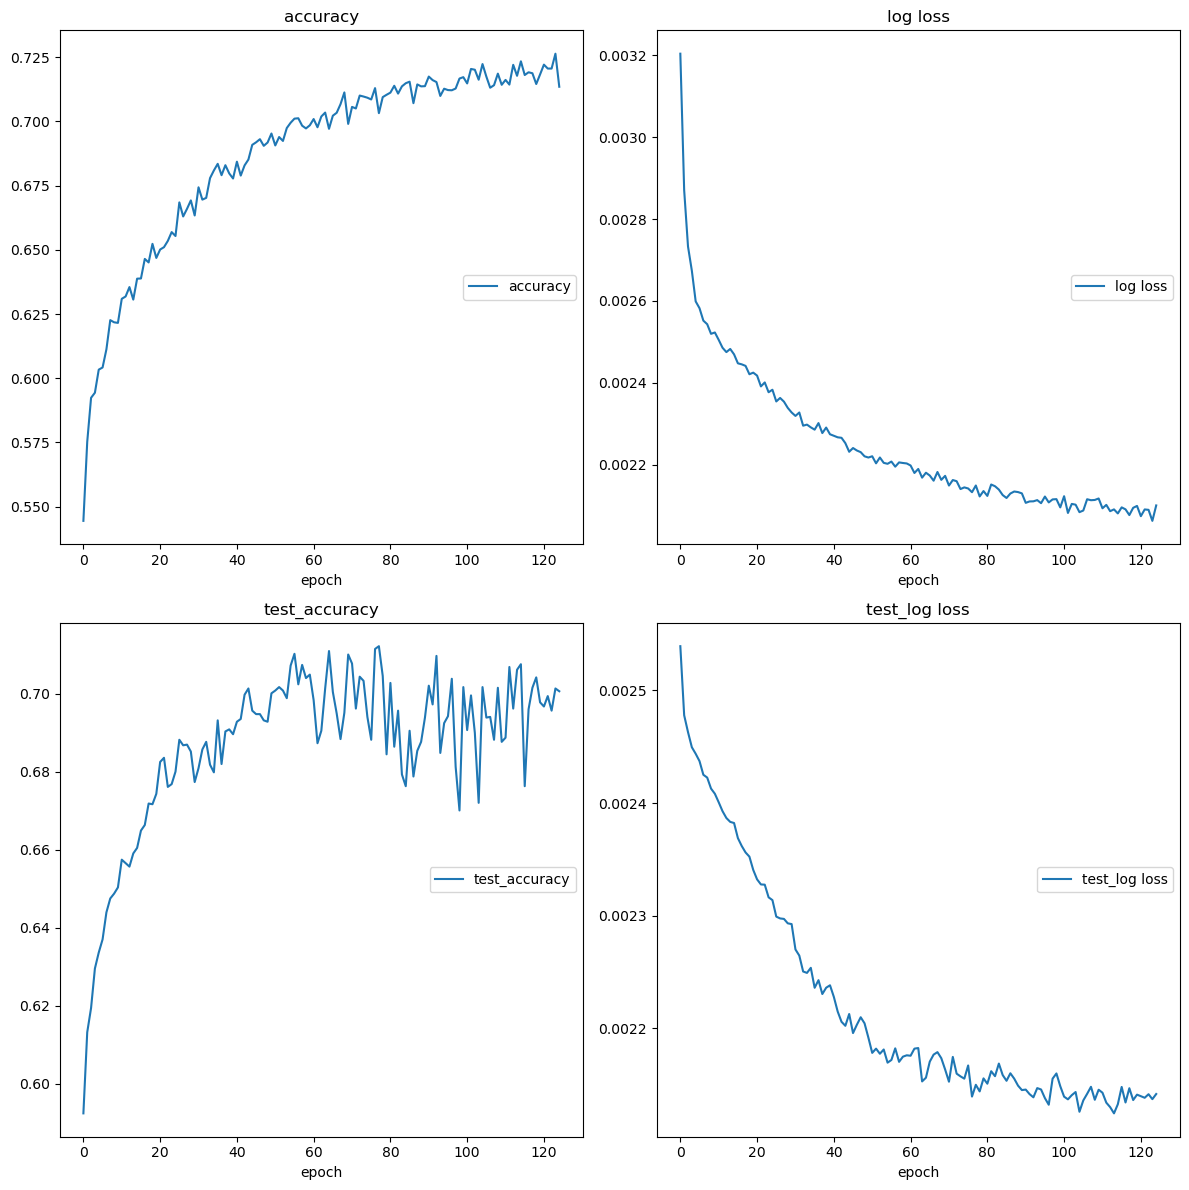

accuracy
	accuracy         	 (min:    0.544, max:    0.726, cur:    0.713)
log loss
	log loss         	 (min:    0.002, max:    0.003, cur:    0.002)
test_accuracy
	test_accuracy    	 (min:    0.592, max:    0.712, cur:    0.701)
test_log loss
	test_log loss    	 (min:    0.002, max:    0.003, cur:    0.002)


In [65]:
train_model(model, loss_fn, optimizer, num_epochs=125)

In [ ]:
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    # `inputs` will contain the input features for the current batch
    # `targets` will contain the corresponding target labels

    # Print the batch index and the sizes of inputs and targets
    print(f"Batch Index: {batch_idx}")
    # print("Input sizes:", inputs.size())
    # print("Target sizes:", targets.size())

    #running it through the model
    model(inputs)